In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  

In [2]:
df = pd.read_csv("Steel_industry_data.csv")

In [3]:
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

In [4]:
df['Load_Type'].unique()

array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

In [5]:
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [6]:
df=df[df['Load_Type']!='Light_Load']

In [7]:
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
132  02/01/2018 09:15      56.84                                  8.32   
133  02/01/2018 09:30      51.26                                  4.54   
134  02/01/2018 09:45      48.13                                  2.34   
135  02/01/2018 10:00      52.81                                  7.06   
136  02/01/2018 10:15      54.79                                  7.52   

     Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
132                                  0.00        0.0   
133                                  0.94        0.0   
134                                  1.15        0.0   
135                                  0.54        0.0   
136                                  0.14        0.0   

     Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
132                         98.95                        100.00  33300   
133                         99.61                         99.98  34200   
134                         99.88                         99.97  35100   
135                         99.12                         99.99  36000   
136                         99.07                        100.00  36900   

    WeekStatus Day_of_week     Load_Type  
132    Weekday     Tuesday   Medium_Load  
133    Weekday     Tuesday   Medium_Load  
134    Weekday     Tuesday   Medium_Load  
135    Weekday     Tuesday   Medium_Load  
136    Weekday     Tuesday  Maximum_Load

In [8]:
df['Load_Type'].unique()

array(['Medium_Load', 'Maximum_Load'], dtype=object)

In [9]:
df['Load_Type']=df['Load_Type'].map({'Medium_Load':0,'Maximum_Load':1})

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df.iloc[:,8] = label_encoder.fit_transform(df.iloc[:,8])
df.iloc[:,9] = label_encoder.fit_transform(df.iloc[:,9])
df.iloc[:,10] = label_encoder.fit_transform(df.iloc[:,10])

In [11]:
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
132  02/01/2018 09:15      56.84                                  8.32   
133  02/01/2018 09:30      51.26                                  4.54   
134  02/01/2018 09:45      48.13                                  2.34   
135  02/01/2018 10:00      52.81                                  7.06   
136  02/01/2018 10:15      54.79                                  7.52   

     Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
132                                  0.00        0.0   
133                                  0.94        0.0   
134                                  1.15        0.0   
135                                  0.54        0.0   
136                                  0.14        0.0   

     Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
132                         98.95                        100.00  33300   
133                         99.61                         99.98  34200   
134                         99.88                         99.97  35100   
135                         99.12                         99.99  36000   
136                         99.07                        100.00  36900   

     WeekStatus  Day_of_week  Load_Type  
132           0            5          0  
133           0            5          0  
134           0            5          0  
135           0            5          0  
136           0            5          1

In [12]:
### split dataset into independent and dependent features

y=df.iloc[:,10]
x=df.iloc[:,[1,3,5,7,8,9]]

In [13]:
x

Usage_kWh  Leading_Current_Reactive_Power_kVarh  \
132        56.84                                  0.00   
133        51.26                                  0.94   
134        48.13                                  1.15   
135        52.81                                  0.54   
136        54.79                                  0.14   
...          ...                                   ...   
34743       5.22                                 21.06   
34744       4.97                                  0.47   
34745       4.97                                  0.00   
34746       4.93                                  0.00   
34747       5.04                                  0.00   

       Lagging_Current_Power_Factor    NSM  WeekStatus  Day_of_week  
132                           98.95  33300           0            5  
133                           99.61  34200           0            5  
134                           99.88  35100           0            5  
135                           99.12  36000           0            5  
136                           99.07  36900           0            5  
...                             ...    ...         ...          ...  
34743                        100.00  79200           0            0  
34744                         79.59  80100           0            0  
34745                         78.52  81000           0            0  
34746                         78.27  81900           0            0  
34747                         78.33  82800           0            0  

[16968 rows x 6 columns]

In [14]:
y

132      0
133      0
134      0
135      0
136      1
        ..
34743    0
34744    1
34745    1
34746    1
34747    1
Name: Load_Type, Length: 16968, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.25, random_state=50)


In [16]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver = "liblinear")


In [17]:
from sklearn.model_selection import GridSearchCV 
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5]}

In [18]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [19]:
classifier_regressor.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 457, in _check_solver
    raise ValueError(
Valu

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 2, 3, 4, 5],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [20]:
print(classifier_regressor.best_params_)

{'C': 4, 'penalty': 'l2'}


In [21]:
print(classifier_regressor.best_score_)

0.7171131417671234


In [22]:
###prediction
y_pred=classifier_regressor.predict(x_test)

In [23]:
###accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [24]:
score=accuracy_score(y_pred,y_test)
print(score)

0.7213578500707214


In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      2286
           1       0.71      0.66      0.69      1956

    accuracy                           0.72      4242
   macro avg       0.72      0.72      0.72      4242
weighted avg       0.72      0.72      0.72      4242



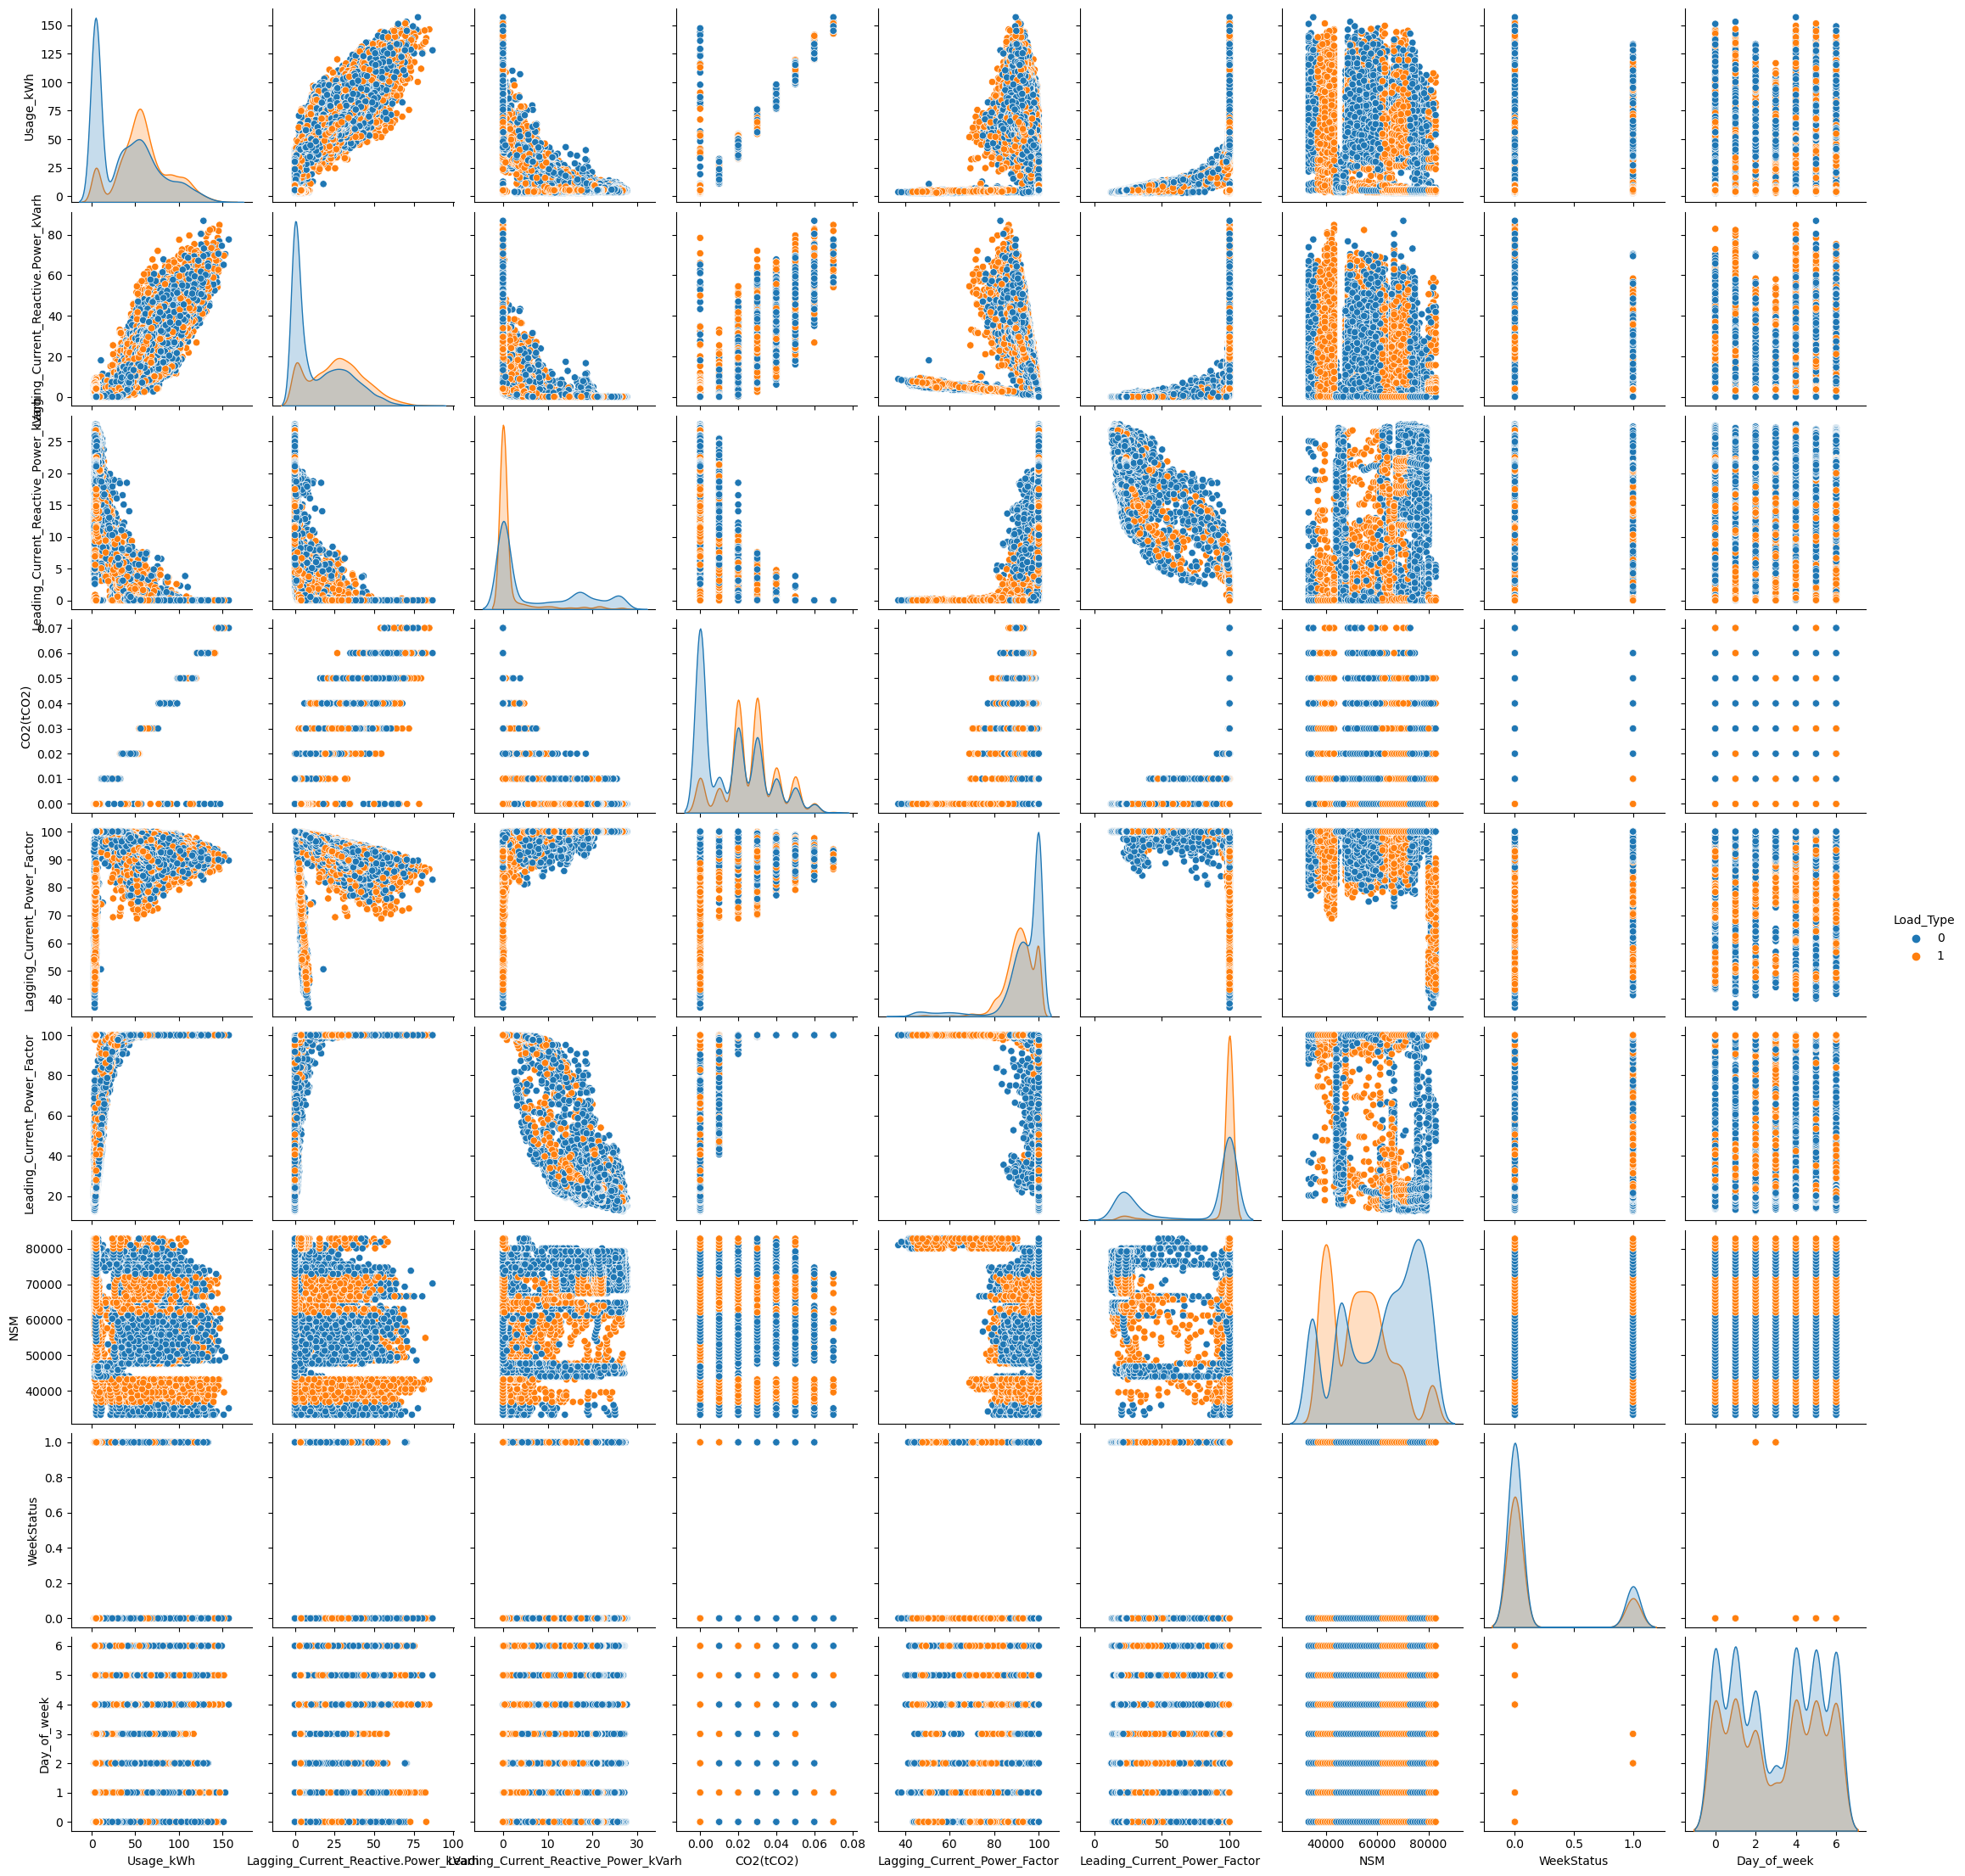

In [26]:
###EDA
sns.pairplot(df,hue='Load_Type')

In [27]:
df.corr()

Usage_kWh  \
Usage_kWh                              1.000000   
Lagging_Current_Reactive.Power_kVarh   0.884887   
Leading_Current_Reactive_Power_kVarh  -0.662035   
CO2(tCO2)                              0.979425   
Lagging_Current_Power_Factor          -0.065154   
Leading_Current_Power_Factor           0.662695   
NSM                                   -0.389817   
WeekStatus                            -0.291423   
Day_of_week                            0.047267   
Load_Type                              0.298153   

                                      Lagging_Current_Reactive.Power_kVarh  \
Usage_kWh                                                         0.884887   
Lagging_Current_Reactive.Power_kVarh                              1.000000   
Leading_Current_Reactive_Power_kVarh                             -0.616859   
CO2(tCO2)                                                         0.866888   
Lagging_Current_Power_Factor                                     -0.316152   
Leading_Current_Power_Factor                                      0.583248   
NSM                                                              -0.381144   
WeekStatus                                                       -0.333667   
Day_of_week                                                       0.049410   
Load_Type                                                         0.324026   

                                      Leading_Current_Reactive_Power_kVarh  \
Usage_kWh                                                        -0.662035   
Lagging_Current_Reactive.Power_kVarh                             -0.616859   
Leading_Current_Reactive_Power_kVarh                              1.000000   
CO2(tCO2)                                                        -0.670136   
Lagging_Current_Power_Factor                                      0.445644   
Leading_Current_Power_Factor                                     -0.944338   
NSM                                                               0.227027   
WeekStatus                                                        0.231831   
Day_of_week                                                      -0.015193   
Load_Type                                                        -0.339502   

                                      CO2(tCO2)  Lagging_Current_Power_Factor  \
Usage_kWh                              0.979425                     -0.065154   
Lagging_Current_Reactive.Power_kVarh   0.866888                     -0.316152   
Leading_Current_Reactive_Power_kVarh  -0.670136                      0.445644   
CO2(tCO2)                              1.000000                     -0.067786   
Lagging_Current_Power_Factor          -0.067786                      1.000000   
Leading_Current_Power_Factor           0.671307                     -0.416460   
NSM                                   -0.385014                     -0.139316   
WeekStatus                            -0.282626                      0.170527   
Day_of_week                            0.041388                     -0.016612   
Load_Type                              0.300938                     -0.103858   

                                      Leading_Current_Power_Factor  \
Usage_kWh                                                 0.662695   
Lagging_Current_Reactive.Power_kVarh                      0.583248   
Leading_Current_Reactive_Power_kVarh                     -0.944338   
CO2(tCO2)                                                 0.671307   
Lagging_Current_Power_Factor                             -0.416460   
Leading_Current_Power_Factor                              1.000000   
NSM                                                      -0.263628   
WeekStatus                                               -0.258461   
Day_of_week                                               0.016802   
Load_Type                                                 0.350264   

                                               NSM    WeekStatus  \
Usage_kWh                  